In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**LOADING AND INSPECTING THE DATASETS**

In [ ]:
#load IPL dataset
deliveries = pd.read_csv('/content/IPL_Deliveries.csv')
matches = pd.read_csv('/content/IPL_Matches.csv')

In [ ]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [ ]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [ ]:
matches.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


In [ ]:
deliveries.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


In [ ]:
matches.isnull().sum()

,0
id,0
season,0
city,51
date,0
match_type,0
player_of_match,5
venue,0
team1,0
team2,0
toss_winner,0


In [ ]:
deliveries.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,0


**EXPLORATORY DATA ANALYSIS**


**ALL IPL TEAMS**

In [ ]:
merged_df = deliveries.merge(matches,how='left',left_on='match_id',right_on='id')

In [ ]:
def all_teams():
    temp = pd.concat([matches['team1'],matches['team2']]).unique()
    return {"teams":temp}


In [ ]:
all_teams()

{'teams': array(['Royal Challengers Bangalore', 'Kings XI Punjab',
        'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
        'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
        'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
        'Gujarat Lions', 'Rising Pune Supergiants',
        'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
        'Lucknow Super Giants', 'Gujarat Titans',
        'Royal Challengers Bengaluru'], dtype=object)}

**ALL IPL PLAYERS**

In [ ]:
def all_players():
    temp = pd.concat([deliveries['batter'],deliveries['bowler']]).unique()
    return {"players":temp}

In [ ]:
all_players()

{'players': array(['SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey',
        'Mohammad Hafeez', 'R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis',
        'CL White', 'MV Boucher', 'B Akhil', 'AA Noffke', 'P Kumar',
        'Z Khan', 'SB Joshi', 'PA Patel', 'ML Hayden', 'MEK Hussey',
        'MS Dhoni', 'SK Raina', 'JDP Oram', 'S Badrinath', 'K Goel',
        'JR Hopes', 'KC Sangakkara', 'Yuvraj Singh', 'SM Katich',
        'IK Pathan', 'T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif',
        'DS Lehmann', 'RA Jadeja', 'M Rawat', 'D Salunkhe', 'SK Warne',
        'SK Trivedi', 'G Gambhir', 'V Sehwag', 'S Dhawan', 'L Ronchi',
        'ST Jayasuriya', 'DJ Thornely', 'RV Uthappa', 'PR Shah',
        'AM Nayar', 'SM Pollock', 'Harbhajan Singh', 'S Chanderpaul',
        'LRPL Taylor', 'AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxman',
        'A Symonds', 'RG Sharma', 'SB Styris', 'AS Yadav', 'SB Bangar',
        'WPUJC Vaas', 'RP Singh', 'WP Saha', 'LR Shukla',
        'DPMD Jayawardene', '

**TEAM ANALYSIS**

**TEAM VS TEAM**

In [ ]:
team1 = 'Kolkata Knight Riders'
team2 = 'Royal Challengers Bangalore'

In [ ]:
def teamVteam(team1,team2):
    temp_df = matches[((matches['team1'] == team1) & (matches['team2'] == team2)) |
        ((matches['team1'] == team2) & (matches['team2'] == team1))]
    total_matches = temp_df.shape[0]
    team1_wins = temp_df[temp_df['winner'] == team1].shape[0]
    team2_wins = temp_df[temp_df['winner'] == team2].shape[0]
    team1_win_per = (team1_wins/total_matches)*100
    team2_win_per = (team2_wins/total_matches)*100

    dic = {
        'team1' : team1,
        'team2' : team2,
        'total_matches':total_matches,
        'wins':{
            team1 : team1_wins,
            team2 : team2_wins
        },
        'total_win_perc':{
            team1 : team1_win_per,
            team2 : team2_win_per
        }

    }
    return dic

this output shows how many matches have CSK and MI have played and in that how many matches each of the team has won, with their winning percentage.

In [ ]:
teamVteam('Chennai Super Kings','Mumbai Indians')

{'team1': 'Chennai Super Kings',
 'team2': 'Mumbai Indians',
 'total_matches': 37,
 'wins': {'Chennai Super Kings': 17, 'Mumbai Indians': 20},
 'total_win_perc': {'Chennai Super Kings': 45.94594594594595,
  'Mumbai Indians': 54.054054054054056}}

**TEAM RECORD**

In [ ]:
team = 'Kings XI Punjab'

In [ ]:
import pandas as pd

def team_record(team):
    # Filter all matches where the given team played
    temp_df = matches[(matches['team1'] == team) | (matches['team2'] == team)]

    # Overall stats
    total_matches = temp_df.shape[0]
    total_wins = (temp_df['winner'] == team).sum()
    total_draws = temp_df['winner'].isnull().sum()
    total_loss = ((temp_df['winner'] != team) & temp_df['winner'].notna()).sum()
    total_win_perc = (total_wins / total_matches) * 100 if total_matches > 0 else 0
    title_wons = temp_df[(temp_df['winner'] == team) & (temp_df['match_type'] == 'Final')].shape[0]

    # Get all unique opponent teams
    teams = pd.concat([temp_df['team1'], temp_df['team2']]).unique()

    # Create a dictionary for records against each opponent
    opponent_stats = {}
    for opponent in teams:
        if opponent != team:
            opponent_df = temp_df[(temp_df['team1'] == opponent) | (temp_df['team2'] == opponent)]
            total_won = (opponent_df['winner'] == team).sum()
            total_matches_vs = opponent_df.shape[0]
            total_loss_vs = ((opponent_df['winner'] != team) & opponent_df['winner'].notna()).sum()
            total_draws_vs = opponent_df['winner'].isnull().sum()
            winning_perc_vs = (total_won / total_matches_vs) * 100 if total_matches_vs > 0 else 0

            opponent_stats[opponent] = {
                'total_matches': total_matches_vs,
                'total_wins': total_won,
                'total_draws': total_draws_vs,
                'total_loss': total_loss_vs,
                'total_win_perc': round(winning_perc_vs, 2)
            }


        # Final dictionary output
    return {
        team: {
            'overall': {
                'match_played': total_matches,
                'won': total_wins,
                'loss': total_loss,
                'draws': total_draws,
                'total_win_perc': round(total_win_perc, 2),
                'titles': title_wons
            },
            'against': opponent_stats
        }
    }

In [ ]:
team_record('Mumbai Indians')

{'Mumbai Indians': {'overall': {'match_played': 261,
   'won': np.int64(144),
   'loss': np.int64(117),
   'draws': np.int64(0),
   'total_win_perc': np.float64(55.17),
   'titles': 5},
  'against': {'Chennai Super Kings': {'total_matches': 37,
    'total_wins': np.int64(20),
    'total_draws': np.int64(0),
    'total_loss': np.int64(17),
    'total_win_perc': np.float64(54.05)},
   'Kings XI Punjab': {'total_matches': 26,
    'total_wins': np.int64(14),
    'total_draws': np.int64(0),
    'total_loss': np.int64(12),
    'total_win_perc': np.float64(53.85)},
   'Kolkata Knight Riders': {'total_matches': 34,
    'total_wins': np.int64(23),
    'total_draws': np.int64(0),
    'total_loss': np.int64(11),
    'total_win_perc': np.float64(67.65)},
   'Deccan Chargers': {'total_matches': 10,
    'total_wins': np.int64(6),
    'total_draws': np.int64(0),
    'total_loss': np.int64(4),
    'total_win_perc': np.float64(60.0)},
   'Delhi Daredevils': {'total_matches': 22,
    'total_wins': np.in

**BAR CHARTS FOR TOP 5 TEAMS STATS**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Get team records for all the team
teams = matches['team1'].unique()
team_stats =[team_record(team)[team]['overall'] for team in teams]
team_df = pd.DataFrame(team_stats,index = teams)

#Select top 5 teams based on wins
top_teams = team_df.sort_values(by='won',ascending = False).head(5)


**STACKED BAR CHART FOR WINS, LOSSES AND DRAWS FOR A TOP 5 TEAMS**

[Text(0, 0, 'Mumbai Indians'),
 Text(1, 0, 'Chennai Super Kings'),
 Text(2, 0, 'Kolkata Knight Riders'),
 Text(3, 0, 'Royal Challengers Bangalore'),
 Text(4, 0, 'Rajasthan Royals')]

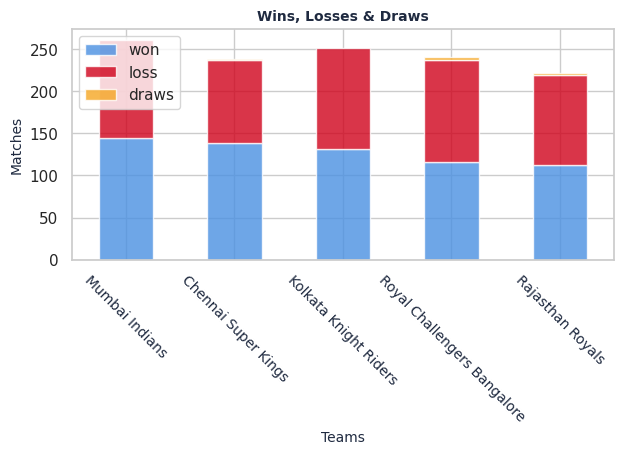

In [ ]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(1,1,  figsize=(7,3), facecolor="white")  # Light gray background

# Plot 1: Stacked Bar Chart for Wins, Losses, and Draws
top_teams[['won', 'loss', 'draws']].plot(
    kind='bar', stacked=True,
    color=["#4A90E2", "#D0021B", "#F5A623"],  # Custom colors
    alpha=0.80, ax=axes
)

axes.set_title("Wins, Losses & Draws", fontsize=10, fontweight="bold", color="#1F2A40")
axes.set_xlabel("Teams", fontsize= 10, color="#1F2A40")
axes.set_ylabel("Matches", fontsize=10, color="#1F2A40")
axes.set_xticklabels(top_teams.index,rotation =-45,fontsize=10, color="#1F2A40")




**COMPARISON OF WINNING PERCENTAGE FOR TOP 5 TEAMS**

<ipython-input-129-7411b79a56ef>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams.index, y=top_teams['total_win_perc'], palette=['#1F2A40', '#2C3E50', '#34495E', '#3B5998', '#4A90E2'], ax=axes)
<ipython-input-129-7411b79a56ef>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(top_teams.index, rotation= -45,fontsize=10, color="#1F2A40")


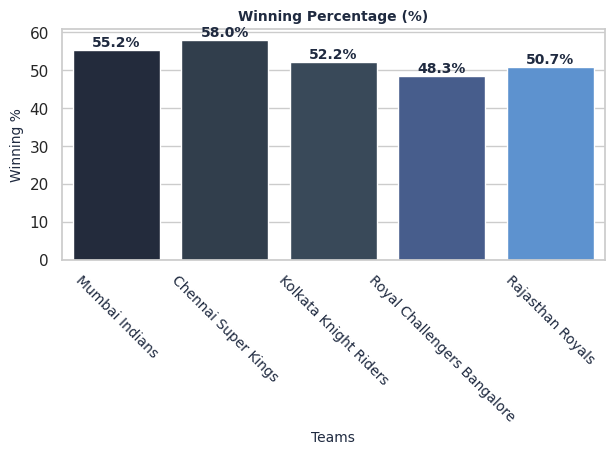

In [ ]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(1,1,  figsize=(7,3), facecolor="white")

# Plot 2: Winning Percentage Comparison
sns.barplot(x=top_teams.index, y=top_teams['total_win_perc'], palette=['#1F2A40', '#2C3E50', '#34495E', '#3B5998', '#4A90E2'], ax=axes)
axes.set_title("Winning Percentage (%)", fontsize=10, fontweight="bold", color="#1F2A40")
axes.set_xlabel("Teams", fontsize=10, color="#1F2A40")
axes.set_ylabel("Winning %", fontsize=10, color="#1F2A40")
axes.set_xticklabels(top_teams.index, rotation= -45,fontsize=10, color="#1F2A40")

# Add annotations
for index, value in enumerate(top_teams['total_win_perc']):
    axes.text(index, value + 1, f"{value:.1f}%", ha="center", fontsize=10, fontweight="bold", color="#1F2A40")



**TITLES WON BY TOP 5 TEAMS**

<ipython-input-130-f60491401f34>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams.index, y=top_teams['titles'], palette="Blues", ax=axes)
<ipython-input-130-f60491401f34>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(top_teams.index, rotation=-45, fontsize=10, color="#1F2A40")


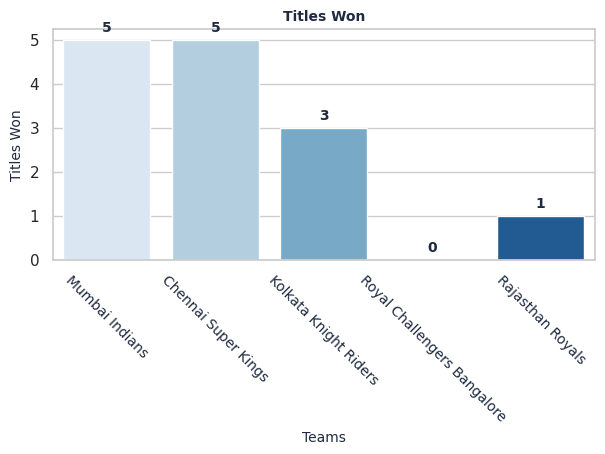

In [ ]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(1,1,  figsize=(7,3), facecolor="white")

# Plot 3: Titles Won
sns.barplot(x=top_teams.index, y=top_teams['titles'], palette="Blues", ax=axes)
axes.set_title("Titles Won", fontsize=10, fontweight="bold", color="#1F2A40")
axes.set_xlabel("Teams", fontsize=10, color="#1F2A40")
axes.set_ylabel("Titles Won", fontsize=10, color="#1F2A40")
axes.set_xticklabels(top_teams.index, rotation=-45, fontsize=10, color="#1F2A40")

# Add annotations
for index, value in enumerate(top_teams['titles']):
    axes.text(index, value + 0.2, f"{int(value)}", ha="center", fontsize=10, fontweight="bold", color="#1F2A40")



**TEAMS WITH MOST WINS**

In [ ]:
def teams_with_most_wins():
  #count the no.of wins for each teams
  team_wins = matches['winner'].value_counts().reset_index()
  team_wins.columns =['team','total_wins']

  #Sort in descending order of wins
  team_wins =team_wins.sort_values(by = 'total_wins',ascending=False).reset_index(drop=True)
  return team_wins

teams_with_most_wins().head(11)


,team,total_wins
0,Mumbai Indians,144
1,Chennai Super Kings,138
2,Kolkata Knight Riders,131
3,Royal Challengers Bangalore,116
4,Rajasthan Royals,112
5,Sunrisers Hyderabad,88
6,Kings XI Punjab,88
7,Delhi Daredevils,67
8,Delhi Capitals,48
9,Deccan Chargers,29


**HIGHEST TOTAL BY THE TEAMS**

In [ ]:
#Highest Total by teams

def toss_winner(x):
  if x.iloc[0] == 'bat':
    return x.iloc[1]
  elif x.iloc[2] != x.iloc[1]:
    return x.iloc[2]
  return x.iloc[3]

In [ ]:
import warnings

warnings.simplefilter(action = 'ignore', category = RuntimeWarning)
df_copy = matches.copy()
df_copy['batting_team'] = df_copy[['toss_decision','toss_winner','team1','team2']].apply(toss_winner, axis=1)
df_copy = df_copy.sort_values(by = "target_runs",ascending = False).reset_index().drop_duplicates()
df_copy['target_runs'] = df_copy['target_runs'] -1
df_copy = df_copy[['batting_team','target_runs']].head(10)

df_copy


,batting_team,target_runs
0,Sunrisers Hyderabad,287.0
1,Sunrisers Hyderabad,277.0
2,Kolkata Knight Riders,272.0
3,Sunrisers Hyderabad,266.0
4,Royal Challengers Bangalore,263.0
5,Kolkata Knight Riders,261.0
6,Delhi Capitals,257.0
7,Lucknow Super Giants,257.0
8,Royal Challengers Bangalore,248.0
9,Chennai Super Kings,246.0


**HIGHEST CHASE BY THE TEAMS**

In [ ]:
df_copy=merged_df[(merged_df['batting_team']==merged_df['winner']) & (merged_df['inning']==2)].copy()
gb=df_copy.groupby(["batting_team","match_id"]).sum()
df_copy=gb['total_runs'].sort_values(ascending=False).reset_index()
df_copy=df_copy[['batting_team','total_runs']].head(10).rename({'batting_team':'Team','total_runs':'Runs'})
df_copy

,batting_team,total_runs
0,Punjab Kings,262
1,Rajasthan Royals,226
2,Rajasthan Royals,224
3,Mumbai Indians,219
4,Sunrisers Hyderabad,217
5,Rajasthan Royals,217
6,Mumbai Indians,216
7,Sunrisers Hyderabad,215
8,Mumbai Indians,214
9,Delhi Daredevils,214


**PERFORMANCE OF A TEAM ON ALL SEASONS USING LINE CHART**

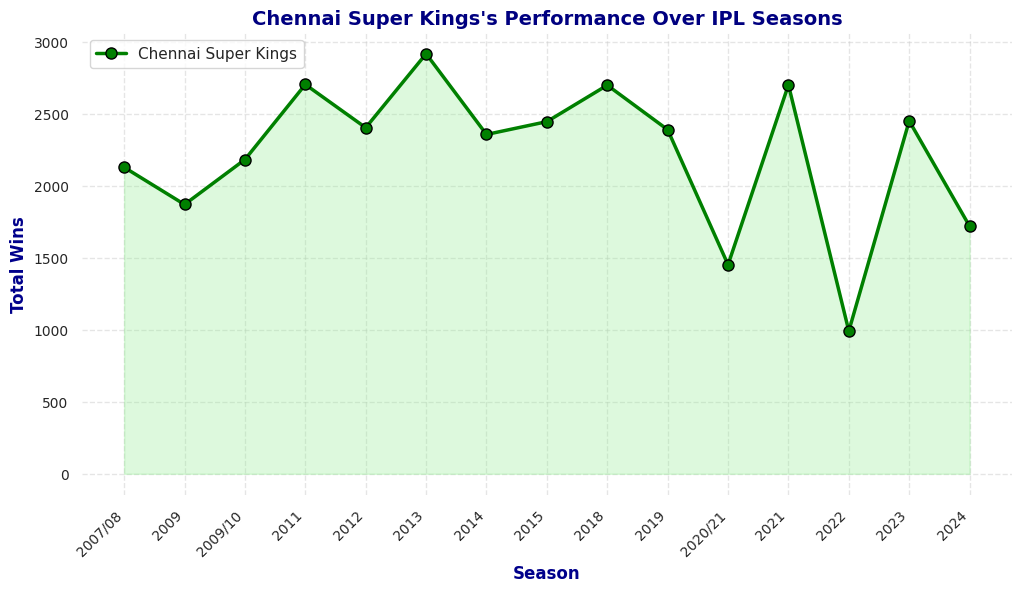

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def team_growth(team_name, df):
    # Filter matches where the given team was either batting or bowling
    df_filtered = df[(df['batting_team'] == team_name) | (df['bowling_team'] == team_name)].copy()

    # Group by season and sum total wins (assuming "winner" column has match winners)
    df_grouped = df_filtered[df_filtered['winner'] == team_name].groupby(['season'], as_index=False)['winner'].count()
    df_grouped.rename(columns={'winner': 'total_wins'}, inplace=True)

    # Check if the team has data
    if df_grouped.empty:
        print(f"No data found for {team_name}")
        return

    # Apply seaborn theme
    sns.set_theme(style="whitegrid")

    # Create the figure
    plt.figure(figsize=(12, 6))

    # Create line plot with area fill
    plt.plot(df_grouped['season'], df_grouped['total_wins'],
             marker="o", color="green", linewidth=2.5,
             markersize=8, markeredgecolor='black', markerfacecolor='green', label=team_name)
    plt.fill_between(df_grouped['season'], df_grouped['total_wins'], color="lightgreen", alpha=0.3)

    # Labels & Title
    plt.xlabel("Season", fontsize=12, fontweight='bold', color="darkblue")
    plt.ylabel("Total Wins", fontsize=12, fontweight='bold', color="darkblue")
    plt.title(f"{team_name}'s Performance Over IPL Seasons", fontsize=14, fontweight="bold", color="navy")

    # Customizing X & Y ticks
    plt.xticks(df_grouped['season'].unique(), rotation=45, ha="right", fontsize=10)
    plt.yticks(fontsize=10)

    # Add legend
    plt.legend(fontsize=11, loc="upper left", frameon=True)

    # Grid and border tweaks
    plt.grid(True, linestyle="--", alpha=0.5)
    sns.despine(left=True, bottom=True)

    # Show the final plot
    plt.show()

# Example Usage
team_growth("Chennai Super Kings", merged_df)



**PERFORMANCE COMPARISON FOR ALL THE SEASONS BETWEEN 2 TEAMS USING LINE CHART**

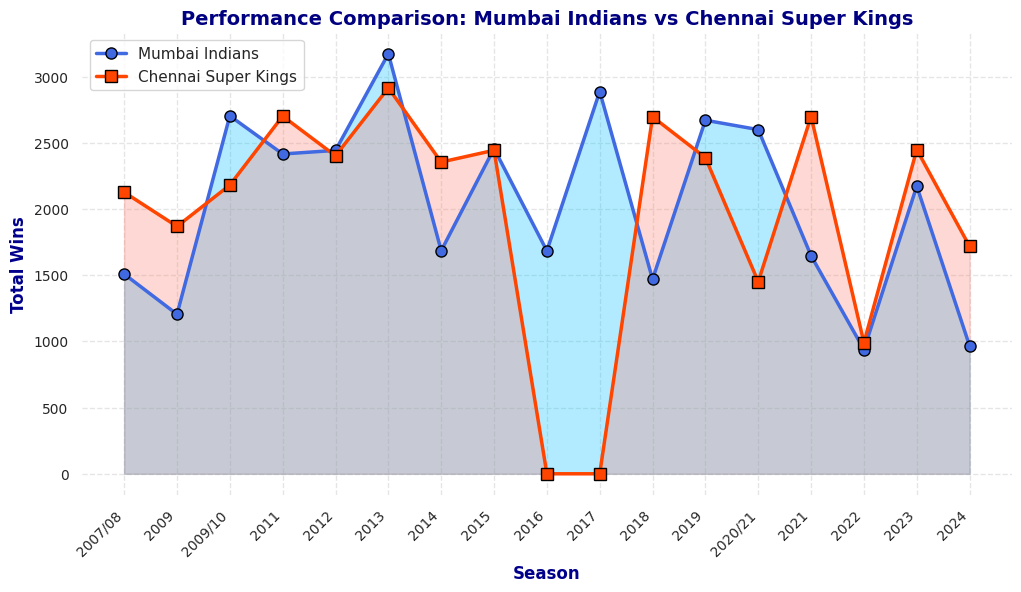

In [ ]:
def compare_team_growth(team1, team2, df):
    # Filter matches where either team played
    df_filtered = df[(df['batting_team'].isin([team1, team2])) | (df['bowling_team'].isin([team1, team2]))].copy()

    # Get wins for each team per season
    df_team1 = df_filtered[df_filtered['winner'] == team1].groupby('season', as_index=False)['winner'].count()
    df_team2 = df_filtered[df_filtered['winner'] == team2].groupby('season', as_index=False)['winner'].count()

    df_team1.rename(columns={'winner': f'{team1}_wins'}, inplace=True)
    df_team2.rename(columns={'winner': f'{team2}_wins'}, inplace=True)

    # Merge datasets for seasons where both played
    df_merged = pd.merge(df_team1, df_team2, on='season', how='outer').fillna(0)

     # Check if data exists for both teams
    if df_merged.empty:
        print(f"Data not found for one or both teams: {team1}, {team2}")
        return

    # Apply seaborn theme
    sns.set_theme(style="whitegrid")

    # Create the figure
    plt.figure(figsize=(12, 6))

    # Plot team 1
    plt.plot(df_merged['season'], df_merged[f'{team1}_wins'],
             marker="o", color="royalblue", linewidth=2.5,
             markersize=8, markeredgecolor='black', markerfacecolor='royalblue', label=team1)
    plt.fill_between(df_merged['season'], df_merged[f'{team1}_wins'], color="deepskyblue", alpha=0.3)

    # Plot team 2
    plt.plot(df_merged['season'], df_merged[f'{team2}_wins'],
             marker="s", color="orangered", linewidth=2.5,
             markersize=8, markeredgecolor='black', markerfacecolor='orangered', label=team2)
    plt.fill_between(df_merged['season'], df_merged[f'{team2}_wins'], color="salmon", alpha=0.3)

    # Labels & Title
    plt.xlabel("Season", fontsize=12, fontweight='bold', color="darkblue")
    plt.ylabel("Total Wins", fontsize=12, fontweight='bold', color="darkblue")
    plt.title(f"Performance Comparison: {team1} vs {team2}", fontsize=14, fontweight="bold", color="navy")

    # Customizing X & Y ticks
    plt.xticks(df_merged['season'].unique(), rotation=45, ha="right", fontsize=10)
    plt.yticks(fontsize=10)

    # Add legend
    plt.legend(fontsize=11, loc="upper left", frameon=True)

    # Grid and border tweaks
    plt.grid(True, linestyle="--", alpha=0.5)
    sns.despine(left=True, bottom=True)

    # Show the final plot
    plt.show()

# Example Usage
compare_team_growth("Mumbai Indians", "Chennai Super Kings", merged_df)


**BATSMAN STATISTICS**

**BATSMAN RECORDS**

In [ ]:
player = 'V Kohli'

In [ ]:
import numpy as np

def get_batsman_statistics(player_name, match_data):
    player_data = match_data[match_data['batter'] == player_name]

    # Filter data for first and second innings only
    innings_data = player_data[player_data['inning'].isin([1, 2])]

    # Batting stats
    total_runs = innings_data['batsman_runs'].sum()
    valid_balls_faced = innings_data[innings_data['extras_type'] != 'wides'].shape[0]
    strike_rate = round((total_runs / valid_balls_faced) * 100, 2) if valid_balls_faced > 0 else 0

    # Boundary count
    total_fours = (innings_data['batsman_runs'] == 4).sum()
    total_sixes = (innings_data['batsman_runs'] == 6).sum()

    # Dismissals and batting average
    dismissals = innings_data[innings_data['is_wicket'] == 1].shape[0]
    batting_average = round(total_runs / dismissals, 2) if dismissals > 0 else np.nan

    # Player of the Match awards
    player_of_match_awards = player_data[player_data['player_of_match'] == player_name].drop_duplicates('match_id').shape[0]

    # Highest score, fifties & centuries
    runs_per_match = player_data.groupby('match_id')['batsman_runs'].sum()
    highest_score = runs_per_match.max() if not runs_per_match.empty else 0
    total_fifties = runs_per_match[(runs_per_match >= 50) & (runs_per_match < 100)].count()
    total_centuries = runs_per_match[runs_per_match >= 100].count()

    # Not out innings
    total_innings = player_data['match_id'].nunique()
    not_outs = total_innings - dismissals

    # Return data as a dictionary for API use
    return {
        "player_name": player_name,
        "total_innings": total_innings,
        "total_runs": total_runs,
        "total_fours": total_fours,
        "total_sixes": total_sixes,
        "batting_average": batting_average,
        "strike_rate": strike_rate,
        "total_fifties": total_fifties,
        "total_centuries": total_centuries,
        "highest_score": highest_score,
        "not_outs": not_outs,
        "player_of_the_match_awards": player_of_match_awards
    }

In [ ]:
get_batsman_statistics(player,merged_df)

{'player_name': 'V Kohli',
 'total_innings': 244,
 'total_runs': np.int64(8004),
 'total_fours': np.int64(706),
 'total_sixes': np.int64(273),
 'batting_average': np.float64(36.72),
 'strike_rate': np.float64(131.97),
 'total_fifties': np.int64(56),
 'total_centuries': np.int64(8),
 'highest_score': 113,
 'not_outs': 26,
 'player_of_the_match_awards': 18}

**PLAYER STATS AGAINST ALL THE TEAMS**

In [ ]:
def player_stats(player):
  res = {
      "all": get_batsman_statistics(player,merged_df),#overall stats
      "against":{} #Dictionary to store stats against each team
  }
  for team in all_teams()["teams"]:#Iterate through all teams
   team_player_df = merged_df[merged_df["bowling_team"] == team]
   res["against"][team] = get_batsman_statistics(player,team_player_df)
  return res #Return final dictionary

In [ ]:
player_stats(player)

{'all': {'player_name': 'V Kohli',
  'total_innings': 244,
  'total_runs': np.int64(8004),
  'total_fours': np.int64(706),
  'total_sixes': np.int64(273),
  'batting_average': np.float64(36.72),
  'strike_rate': np.float64(131.97),
  'total_fifties': np.int64(56),
  'total_centuries': np.int64(8),
  'highest_score': 113,
  'not_outs': 26,
  'player_of_the_match_awards': 18},
 'against': {'Royal Challengers Bangalore': {'player_name': 'V Kohli',
   'total_innings': 0,
   'total_runs': np.int64(0),
   'total_fours': np.int64(0),
   'total_sixes': np.int64(0),
   'batting_average': nan,
   'strike_rate': 0,
   'total_fifties': np.int64(0),
   'total_centuries': np.int64(0),
   'highest_score': 0,
   'not_outs': 0,
   'player_of_the_match_awards': 0},
  'Kings XI Punjab': {'player_name': 'V Kohli',
   'total_innings': 25,
   'total_runs': np.int64(681),
   'total_fours': np.int64(77),
   'total_sixes': np.int64(18),
   'batting_average': np.float64(28.38),
   'strike_rate': np.float64(129.

In [ ]:
def PlayerVsTeam(player,team):
  team_player_df = merged_df[merged_df['bowling_team'] == team]
  return get_batsman_statistics(player,team_player_df)

In [ ]:
PlayerVsTeam(player,team)

{'player_name': 'V Kohli',
 'total_innings': 25,
 'total_runs': np.int64(681),
 'total_fours': np.int64(77),
 'total_sixes': np.int64(18),
 'batting_average': np.float64(28.38),
 'strike_rate': np.float64(129.47),
 'total_fifties': np.int64(2),
 'total_centuries': np.int64(1),
 'highest_score': 113,
 'not_outs': 1,
 'player_of_the_match_awards': 1}

**STATS OF BATSMAN VS BATSMAN**

In [ ]:
player1 = 'V Kohli'
player2 = 'RG Sharma'

In [ ]:
def batsman_vs_batsman(player1,player2,match_data):
  #Get individual stats for both batsmen
  stats_player1 = get_batsman_statistics(player1,match_data)
  stats_player2 = get_batsman_statistics(player2,match_data)

  #Return structured data
  return{
      "matchup_type": "batsman_vs_batsman",
      player1: stats_player1,
      player2: stats_player2
  }

In [ ]:
batsman_vs_batsman(player1,player2,merged_df)

{'matchup_type': 'batsman_vs_batsman',
 'V Kohli': {'player_name': 'V Kohli',
  'total_innings': 244,
  'total_runs': np.int64(8004),
  'total_fours': np.int64(706),
  'total_sixes': np.int64(273),
  'batting_average': np.float64(36.72),
  'strike_rate': np.float64(131.97),
  'total_fifties': np.int64(56),
  'total_centuries': np.int64(8),
  'highest_score': 113,
  'not_outs': 26,
  'player_of_the_match_awards': 18},
 'RG Sharma': {'player_name': 'RG Sharma',
  'total_innings': 251,
  'total_runs': np.int64(6628),
  'total_fours': np.int64(599),
  'total_sixes': np.int64(281),
  'batting_average': np.float64(28.57),
  'strike_rate': np.float64(131.14),
  'total_fifties': np.int64(43),
  'total_centuries': np.int64(2),
  'highest_score': 109,
  'not_outs': 19,
  'player_of_the_match_awards': 19}}

**TOP 10 MOST RUNS BY PLAYERS IN IPL**

In [ ]:
#Get total runs for each player
batsman_totals = merged_df.groupby('batter')['batsman_runs'].sum().sort_values(ascending = False)

#Select top 5 batsmen
top_10_batsman = batsman_totals.head(10).index.tolist()

#Get stats for each player
batsman_stats = [get_batsman_statistics(player,merged_df)for player in top_10_batsman]

#convert to Dataframe for easy plotting
batsman_df = pd.DataFrame(batsman_stats)
batsman_df.set_index('player_name',inplace=True)
batsman_df.reset_index()[['player_name','total_runs']]

,player_name,total_runs
0,V Kohli,8004
1,S Dhawan,6769
2,RG Sharma,6628
3,DA Warner,6565
4,SK Raina,5528
5,MS Dhoni,5243
6,AB de Villiers,5162
7,CH Gayle,4965
8,RV Uthappa,4952
9,KD Karthik,4842


**TOP 10 STRIKE RATE BY PLAYER IN IPL**

In [ ]:
#Calculate strike rate, tota runs and balls faced for each batsman

batsman_stats_df = merged_df.groupby('batter').agg(total_runs =('batsman_runs','sum'),balls_faced = ('batsman_runs',lambda x: merged_df.loc[x.index,'extras_type'].ne('wides').sum()))

#Calculate strike rate
batsman_stats_df['strike_rate'] = (batsman_stats_df['total_runs']/batsman_stats_df['balls_faced'])*100
batsman_stats_df = batsman_stats_df.sort_values(by='strike_rate',ascending=False)

#Select top 10 batsman by strike rate
top_10_batsman = batsman_stats_df.head(10).reset_index()

top_10_batsman

,batter,total_runs,balls_faced,strike_rate
0,L Wood,9,3,300.000000
1,B Stanlake,5,2,250.000000
2,J Fraser-McGurk,330,141,234.042553
3,R Sai Kishore,13,6,216.666667
4,Umar Gul,39,19,205.263158
5,RS Sodhi,4,2,200.000000
6,R Shepherd,115,63,182.539683
7,Naman Dhir,140,79,177.215190
8,LJ Wright,106,60,176.666667
9,Shahid Afridi,81,46,176.086957


**TOP 10 MOST 4'S HIT BY A BATSMAN**

In [ ]:
#count the number of fours hit by each batsman
batsman_fours_df = merged_df[merged_df['batsman_runs'] == 4].groupby('batter').size().reset_index(name = 'total_fours')

#sort in descending order
batsman_fours_df = batsman_fours_df.sort_values(by = 'total_fours', ascending = False)

#Get top 10 batsman
top_10_batsman_fours = batsman_fours_df.head(10)

top_10_batsman_fours

,batter,total_fours
416,S Dhawan,768
508,V Kohli,708
119,DA Warner,663
388,RG Sharma,599
441,SK Raina,506
158,G Gambhir,492
406,RV Uthappa,481
43,AM Rahane,479
230,KD Karthik,466
155,F du Plessis,422


**TOP 10 MOST 6'S HIT BY A BATSMAN**

In [ ]:
#Count the number of sixes hit by each batsman
batsman_sixes_df = merged_df[merged_df['batsman_runs'] == 6].groupby('batter').size().reset_index(name = 'total_sixes')

#Sort in descending order
batsman_sixes_df = batsman_sixes_df.sort_values(by ='total_sixes',ascending=False)

#Get top 10 Batsman
top_10_batsman_sixes = batsman_sixes_df.head(10)

top_10_batsman_sixes

,batter,total_sixes
84,CH Gayle,359
324,RG Sharma,281
427,V Kohli,273
14,AB de Villiers,253
254,MS Dhoni,252
98,DA Warner,236
184,KA Pollard,224
23,AD Russell,209
387,SV Samson,206
365,SK Raina,204


**TOP 10 CATCHES**

In [ ]:
#Filter dataset to include only 'caught' dismissals
catch_data =merged_df[merged_df['dismissal_kind'] == 'caught']

#Count the number of catches per player
fielder_catches = catch_data['fielder'].value_counts().reset_index()
fielder_catches.columns = ['player','total_catches']

#Get the top 10 fielders with the most catches
top_10_fielders = fielder_catches.head(10)

top_10_fielders

,player,total_catches
0,MS Dhoni,152
1,KD Karthik,145
2,AB de Villiers,120
3,V Kohli,114
4,SK Raina,106
5,RG Sharma,100
6,S Dhawan,100
7,RA Jadeja,97
8,KA Pollard,97
9,WP Saha,93


**TOP 5 BATSMAN COMPARISON**

In [ ]:
batsman_df = batsman_df.head(5)

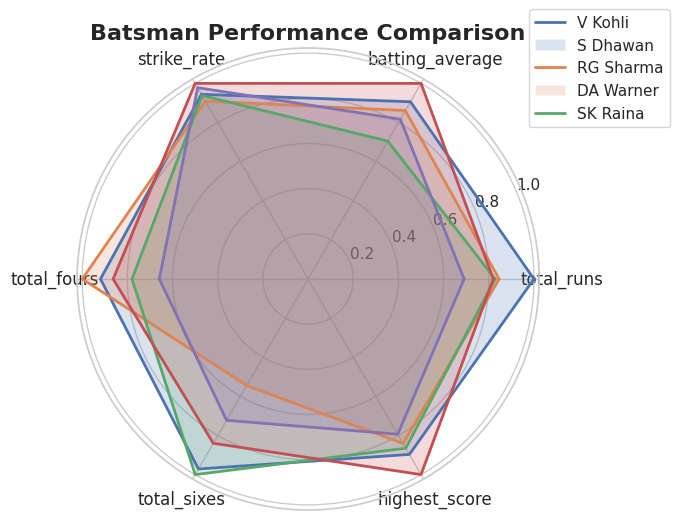

In [ ]:
from math import pi

#Normalize data for better visualization
stats = ["total_runs","batting_average","strike_rate","total_fours","total_sixes","highest_score"]
df_normalized = batsman_df[stats]/batsman_df[stats].max()#Normalizing the values

#Create radar chart
fig,ax = plt.subplots(figsize = (6,6),subplot_kw = dict(polar = True))

#Define angles for each metric
angles = [n/float(len(stats))* 2 * pi for n in range(len(stats))]
angles += angles[:1] #close the circle

#plot each batsman
for player in batsman_df.index:
  values = df_normalized.loc[player].tolist()
  values += values[:1]#close the circle
  ax.plot(angles,values,linewidth=2,linestyle="solid",label=player)
  ax.fill(angles,values,alpha = 0.2)

#Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(stats,fontsize=12)
plt.title("Batsman Performance Comparison", fontsize =16,fontweight ="bold")

#Add legend
plt.legend(batsman_df.index, loc ="upper right",bbox_to_anchor =(1.3, 1.1))

plt.show()

**TOP 5 BATSMAN PERFORMANCE USING HEATMAP**

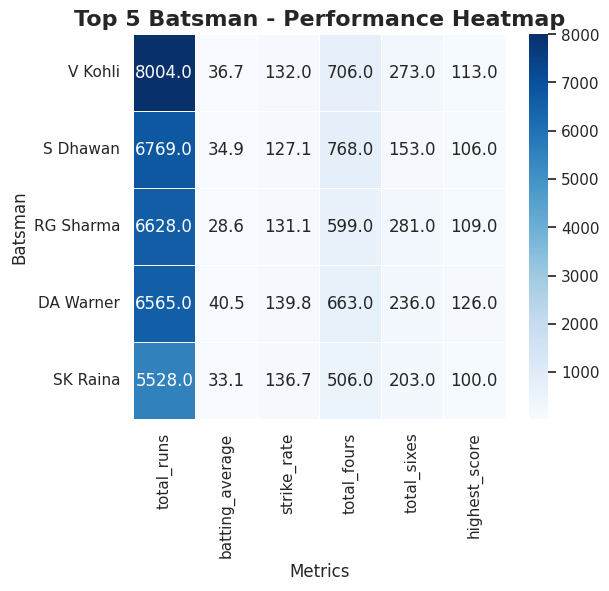

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(batsman_df[stats], annot = True, cmap ="Blues" ,linewidths=0.5,fmt =".1f")
plt.title("Top 5 Batsman - Performance Heatmap",fontsize = 16, fontweight ="bold")
plt.xlabel("Metrics",fontsize =12)
plt.ylabel("Batsman", fontsize =12)
plt.show()

**BATSMAN GROWTH OVER SEASONS**

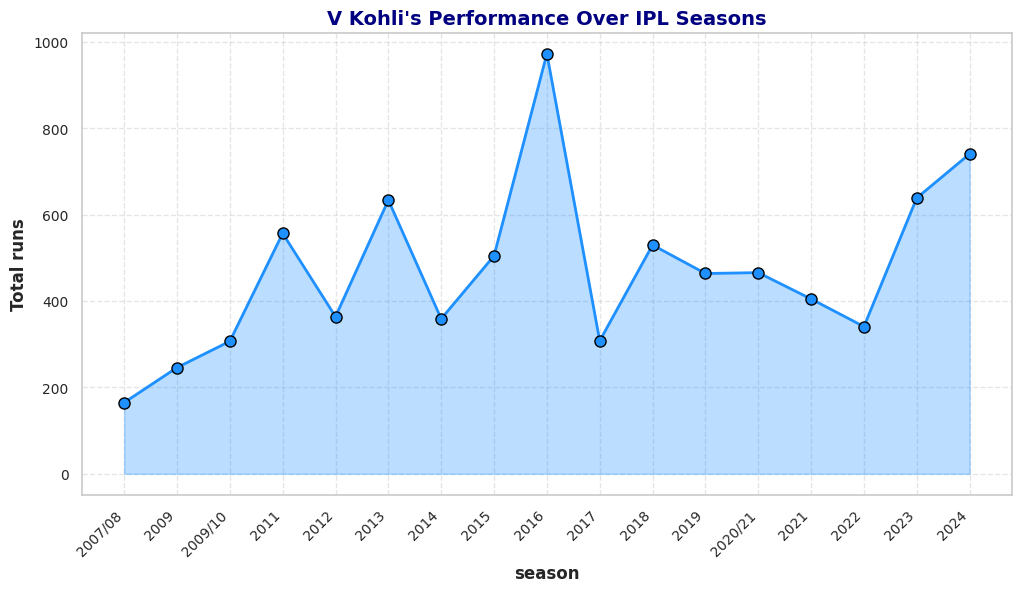

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def batsman_growth(batsman_name, df):
  #Filter for first and second innings
  df_filtered = df[df.inning.isin([1,2])].copy()

  #Filter for the given batsman
  df_filtered = df_filtered[df_filtered['batter'] ==  batsman_name]

  #Group by season and sum total runs
  df_grouped = df_filtered.groupby(['season'], as_index = False)['batsman_runs'].sum()

  #Check if the batsman has data
  if df_grouped.empty:
    print("No data found for {batsman_name}")
    return

  #Set the seaborn theme
  sns.set_style("whitegrid")
  plt.figure(figsize = (12,6))

  #Create line plot with area fill
  plt.plot(df_grouped['season'], df_grouped['batsman_runs'], marker ="o", color ="dodgerblue",linewidth = 2, markersize = 8,markeredgecolor = 'black', markerfacecolor = 'dodgerblue')
  plt.fill_between(df_grouped['season'], df_grouped['batsman_runs'], color = "dodgerblue",alpha =0.3)

  #Labels & Title
  plt.xlabel("season", fontsize = 12, fontweight ='bold')
  plt.ylabel("Total runs", fontsize = 12, fontweight = 'bold')
  plt.title(f"{batsman_name}'s Performance Over IPL Seasons", fontsize=14, fontweight="bold",color="navy")

  #Improved X-ticks
  plt.xticks(df_grouped['season'].unique(),rotation = 45, ha = "right", fontsize=10)
  plt.yticks(fontsize = 10)

  #Grid and background
  plt.grid(True, linestyle ="--",alpha=0.5)

  #Show the final plot
  plt.show()

#Example Usage
batsman_growth("V Kohli", merged_df)

**COMPARISON OF 2 BATSMAN GROWTH**

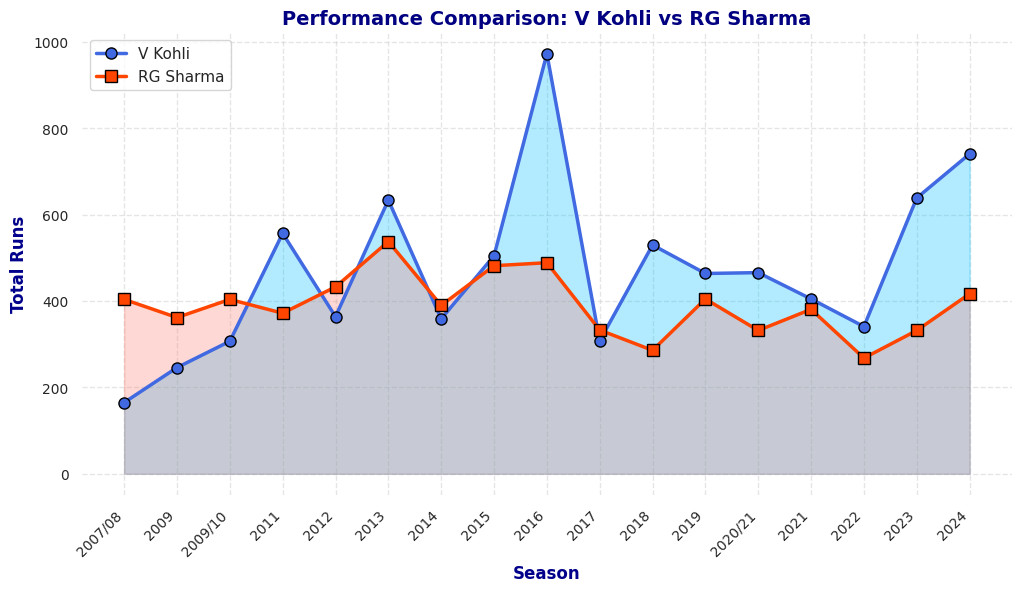

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def compare_batsman_growth(batsman1, batsman2, df):
    # Filter for first and second innings
    df_filtered = df[df.inning.isin([1, 2])].copy()

    # Filter for the selected batsmen
    df_batsman1 = df_filtered[df_filtered['batter'] == batsman1].groupby('season', as_index=False)['batsman_runs'].sum()
    df_batsman2 = df_filtered[df_filtered['batter'] == batsman2].groupby('season', as_index=False)['batsman_runs'].sum()

    # Check if data exists for both players
    if df_batsman1.empty or df_batsman2.empty:
        print(f"Data not found for one or both players: {batsman1}, {batsman2}")
        return

    # Merge datasets for seasons where both played
    df_merged = pd.merge(df_batsman1, df_batsman2, on='season', how='outer', suffixes=(f'_{batsman1}', f'_{batsman2}')).fillna(0)

    # Apply seaborn theme
    sns.set_theme(style="whitegrid")

    # Create the figure
    plt.figure(figsize=(12, 6))

    # Plot batsman 1
    plt.plot(df_merged['season'], df_merged[f'batsman_runs_{batsman1}'],
             marker="o", color="royalblue", linewidth=2.5,
             markersize=8, markeredgecolor='black', markerfacecolor='royalblue', label=batsman1)
    plt.fill_between(df_merged['season'], df_merged[f'batsman_runs_{batsman1}'], color="deepskyblue", alpha=0.3)

    # Plot batsman 2
    plt.plot(df_merged['season'], df_merged[f'batsman_runs_{batsman2}'],
             marker="s", color="orangered", linewidth=2.5,
             markersize=8, markeredgecolor='black', markerfacecolor='orangered', label=batsman2)
    plt.fill_between(df_merged['season'], df_merged[f'batsman_runs_{batsman2}'], color="salmon", alpha=0.3)

    # Labels & Title
    plt.xlabel("Season", fontsize=12, fontweight='bold', color="darkblue")
    plt.ylabel("Total Runs", fontsize=12, fontweight='bold', color="darkblue")
    plt.title(f"Performance Comparison: {batsman1} vs {batsman2}", fontsize=14, fontweight="bold", color="navy")

    # Customizing X & Y ticks
    plt.xticks(df_merged['season'].unique(), rotation=45, ha="right", fontsize=10)
    plt.yticks(fontsize=10)

    # Add legend
    plt.legend(fontsize=11, loc="upper left", frameon=True)

     # Grid and border tweaks
    plt.grid(True, linestyle="--", alpha=0.5)
    sns.despine(left=True, bottom=True)

    # Show the final plot
    plt.show()

# Example Usage
compare_batsman_growth("V Kohli", "RG Sharma", merged_df)


**BOWLER STATISTICS**

In [ ]:
bowler_data = merged_df.copy()

In [ ]:
bowler_data.extras_type.value_counts()

,count
extras_type,
wides,8380
legbyes,4001
noballs,1069
byes,673
penalty,2


In [ ]:
def bowlerRun(x):
  if x.iloc[0] in ['legbyes', 'penalty','byes']:
    return 0
  else:
    return x.iloc[1]

In [ ]:
bowler_data["bowler_run"] = (bowler_data[['extras_type','total_runs']].apply(bowlerRun,axis=1))

In [ ]:
def bowler_wicket(x):
  if x.iloc[0] in ["caught", "bowled", "lbw","caught and bowled","stumped", "hit wicket"]:
    return x.iloc[1]
  else:
    return 0

In [ ]:
bowler_data['isBowlerWicket'] = bowler_data[['dismissal_kind','is_wicket']].apply(bowler_wicket,axis=1)

**RECORD OF A BOWLER**

In [ ]:
def get_bowler_statistics(bowler, match_data):
    # Filter data for the bowler
    bowler_data = match_data[match_data['bowler'] == bowler].copy()

    if bowler_data.empty:
        return {}

    # Total innings played as a bowler
    total_innings = bowler_data['match_id'].nunique()

    # Total wickets (only bowler-induced dismissals)
    total_wickets = bowler_data["isBowlerWicket"].sum()

    # Total runs conceded (excluding leg byes, byes, and penalties)
    total_runs_conceded = bowler_data["bowler_run"].sum()

    # Total balls bowled (excluding wides & no-balls)
    valid_balls_bowled = bowler_data[~bowler_data["extras_type"].isin(["wides", "noballs"])].shape[0]

    # Economy rate (Runs per over)
    economy_rate = round((total_runs_conceded / (valid_balls_bowled / 6)), 2) if valid_balls_bowled > 0 else 0

    # Bowling average (Runs per wicket)
    bowling_average = round(total_runs_conceded / total_wickets, 2) if total_wickets > 0 else np.nan

    # Bowling strike rate (Balls per wicket)
    bowling_strike_rate = round(valid_balls_bowled / total_wickets, 2) if total_wickets > 0 else np.nan

    # Fours & Sixes Conceded
    total_fours_conceded = (bowler_data['batsman_runs'] == 4).sum()
    total_sixes_conceded = (bowler_data['batsman_runs'] == 6).sum()

    # 3-wicket, 4-wicket, and 5-wicket hauls
    wickets_per_match = bowler_data.groupby("match_id")["isBowlerWicket"].sum()
    three_wicket_hauls = (wickets_per_match >= 3).sum()
    four_wicket_hauls = (wickets_per_match >= 4).sum()
    five_wicket_hauls = (wickets_per_match >= 5).sum()

    # Best Bowling Figures (Wickets/Runs in a Match)
    best_wickets = wickets_per_match.max() if not wickets_per_match.empty else 0
    best_match_data = bowler_data.groupby("match_id")[["isBowlerWicket", "bowler_run"]].sum()
    best_bowling_match = best_match_data.loc[best_match_data["isBowlerWicket"].idxmax()] if not best_match_data.empty else None
    best_bowling_figure = f"{int(best_bowling_match['isBowlerWicket'])}/{int(best_bowling_match['bowler_run'])}" if best_bowling_match is not None else "0/0"

    # Man of the Match Awards (MOM)
    player_of_match_awards = bowler_data[bowler_data['player_of_match'] == bowler]['match_id'].nunique()

    return {
        "bowler": bowler,
        "innings": total_innings,
        "wickets": total_wickets,
        "economy": economy_rate,
        "average": bowling_average,
        "strikeRate": bowling_strike_rate,
        "fours": total_fours_conceded,
        "sixes": total_sixes_conceded,
        "best_figure": best_bowling_figure,
        "3w": three_wicket_hauls,
        "4w": four_wicket_hauls,
        "5w": five_wicket_hauls,
        "mom": player_of_match_awards
    }

In [ ]:
get_bowler_statistics('RA Jadeja',bowler_data)

{'bowler': 'RA Jadeja',
 'innings': 211,
 'wickets': np.int64(160),
 'economy': np.float64(7.62),
 'average': np.float64(30.4),
 'strikeRate': np.float64(23.93),
 'fours': np.int64(290),
 'sixes': np.int64(207),
 'best_figure': '5/16',
 '3w': np.int64(17),
 '4w': np.int64(4),
 '5w': np.int64(1),
 'mom': 16}

In [ ]:
def bowler_record(bowler):
    res = {
        "all": get_bowler_statistics(bowler, bowler_data),  # Overall stats
        "against": {}  # Dictionary to store stats against each team
    }

    for team in all_teams()["teams"]:  # Iterate through all teams
        team_bowler_df = bowler_data[bowler_data["batting_team"] == team]
        res["against"][team] = get_bowler_statistics(bowler, team_bowler_df)

    return res  # Return final dictionary

In [ ]:
bowler_record('RA Jadeja')

{'all': {'bowler': 'RA Jadeja',
  'innings': 211,
  'wickets': np.int64(160),
  'economy': np.float64(7.62),
  'average': np.float64(30.4),
  'strikeRate': np.float64(23.93),
  'fours': np.int64(290),
  'sixes': np.int64(207),
  'best_figure': '5/16',
  '3w': np.int64(17),
  '4w': np.int64(4),
  '5w': np.int64(1),
  'mom': 16},
 'against': {'Royal Challengers Bangalore': {'bowler': 'RA Jadeja',
   'innings': 27,
   'wickets': np.int64(26),
   'economy': np.float64(7.19),
   'average': np.float64(24.62),
   'strikeRate': np.float64(20.54),
   'fours': np.int64(40),
   'sixes': np.int64(25),
   'best_figure': '3/15',
   '3w': np.int64(4),
   '4w': np.int64(0),
   '5w': np.int64(0),
   'mom': 3},
  'Kings XI Punjab': {'bowler': 'RA Jadeja',
   'innings': 18,
   'wickets': np.int64(13),
   'economy': np.float64(8.29),
   'average': np.float64(35.69),
   'strikeRate': np.float64(25.85),
   'fours': np.int64(29),
   'sixes': np.int64(20),
   'best_figure': '3/22',
   '3w': np.int64(1),
   '4

**BOWLER VS TEAMS**

In [ ]:
def bowler_vs_team(bowler,team):
  temp_df = bowler_data[bowler_data['batting_team'] == team]
  return get_bowler_statistics(bowler,temp_df)

In [ ]:
bowler_vs_team('RA Jadeja', 'Royal Challengers Bangalore')

{'bowler': 'RA Jadeja',
 'innings': 27,
 'wickets': np.int64(26),
 'economy': np.float64(7.19),
 'average': np.float64(24.62),
 'strikeRate': np.float64(20.54),
 'fours': np.int64(40),
 'sixes': np.int64(25),
 'best_figure': '3/15',
 '3w': np.int64(4),
 '4w': np.int64(0),
 '5w': np.int64(0),
 'mom': 3}

**BOWLER VS BOWLER**

In [ ]:
def bowler_vs_bowler(bowler1, bowler2):
  #Fetch stats for both the bowlers
  stats_bowler1 = get_bowler_statistics(bowler1,bowler_data)
  stats_bowler2 = get_bowler_statistics(bowler2,bowler_data)

  #Return a dictionary comparing both bowlers
  return{
      bowler1:stats_bowler1 if stats_bowler1 else{},
      bowler2:stats_bowler2 if stats_bowler2 else{}
  }

In [ ]:
bowler_vs_bowler('JJ Bumrah','MA Starc')

{'JJ Bumrah': {'bowler': 'JJ Bumrah',
  'innings': 133,
  'wickets': np.int64(168),
  'economy': np.float64(7.3),
  'average': np.float64(22.28),
  'strikeRate': np.float64(18.3),
  'fours': np.int64(336),
  'sixes': np.int64(112),
  'best_figure': '5/29',
  '3w': np.int64(24),
  '4w': np.int64(5),
  '5w': np.int64(3),
  'mom': 10},
 'MA Starc': {'bowler': 'MA Starc',
  'innings': 39,
  'wickets': np.int64(51),
  'economy': np.float64(8.21),
  'average': np.float64(22.29),
  'strikeRate': np.float64(16.29),
  'fours': np.int64(124),
  'sixes': np.int64(31),
  'best_figure': '4/15',
  '3w': np.int64(7),
  '4w': np.int64(2),
  '5w': np.int64(0),
  'mom': 3}}

**TOP 10 BOWLER**

In [ ]:
import pandas as pd
import numpy as np

#Filter only wicket-taking deliveries
wicket_data = merged_df[merged_df['is_wicket'] ==1]

#Exclude Run outs, as they are not credited to bowlers
valid_dismissals = ["bowler","caught","lbw","stumped","caught and bowled","hit wicket"]
wicket_data = wicket_data[wicket_data['dismissal_kind'].isin(valid_dismissals)]

#Filter only deliveries where a ball was bowled
valid_balls = merged_df[merged_df['extras_type'] != 'wides']

#Count total balls bowled by each bowler
balls_bowled = valid_balls.groupby('bowler')['ball'].count().reset_index()
balls_bowled.columns = ['bowler','total_balls']

#Calculate total overs bowled
balls_bowled['total_overs'] = balls_bowled['total_balls']//6 + (balls_bowled['total_balls']%6)/10 #Convert balls to overs properly

#Get total runs conceded by each bowler
runs_conceded = merged_df.groupby('bowler')['total_runs'].sum().reset_index()
runs_conceded.columns = ['bowler', 'total_runs_conceded']

# Get only legitimate wickets (excluding run-outs)
wicket_data = merged_df[merged_df['is_wicket'] == 1]
valid_dismissals = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
wickets_taken = wicket_data[wicket_data['dismissal_kind'].isin(valid_dismissals)].groupby("bowler")['is_wicket'].count().reset_index()
wickets_taken.columns = ['bowler', 'total_wickets']
# Merge all stats
bowler_stats = balls_bowled.merge(runs_conceded, on="bowler", how="left").merge(wickets_taken, on="bowler", how="left").fillna(0)

# Calculate bowling metrics
bowler_stats['bowling_average'] = np.where(bowler_stats['total_wickets'] > 0, bowler_stats['total_runs_conceded'] / bowler_stats['total_wickets'], np.nan)
bowler_stats['economy_rate'] = np.where(bowler_stats['total_overs'] > 0, bowler_stats['total_runs_conceded'] / bowler_stats['total_overs'], np.nan)
bowler_stats['strike_rate'] = np.where(bowler_stats['total_wickets'] > 0, bowler_stats['total_balls'] / bowler_stats['total_wickets'], np.nan)

# Get top 10 bowlers by wickets
top_10_bowlers = bowler_stats.sort_values(by="total_wickets", ascending=False).head(10)

# Select relevant columns
top_10_bowlers = top_10_bowlers[['bowler', 'total_wickets', 'total_runs_conceded', 'total_overs', 'bowling_average', 'economy_rate', 'strike_rate']]

top_10_bowlers

,bowler,total_wickets,total_runs_conceded,total_overs,bowling_average,economy_rate,strike_rate
524,YS Chahal,205.0,4681,588.2,22.834146,7.958177,17.219512
348,PP Chawla,192.0,5179,642.0,26.973958,8.066978,20.062500
119,DJ Bravo,183.0,4436,521.3,24.240437,8.509495,17.098361
71,B Kumar,181.0,5051,653.4,27.906077,7.730334,21.668508
446,SP Narine,180.0,4672,680.5,25.955556,6.865540,22.694444
355,R Ashwin,180.0,5435,754.4,30.194444,7.204401,25.155556
8,A Mishra,174.0,4193,565.2,24.097701,7.418613,19.494253
438,SL Malinga,170.0,3486,474.2,20.505882,7.351329,16.741176
193,JJ Bumrah,168.0,3840,518.0,22.857143,7.413127,18.500000
373,RA Jadeja,160.0,4917,639.0,30.731250,7.694836,23.962500


**MOST WICKETS TAKEN BY A BOWLER**

In [ ]:
top_10_bowlers[['bowler','total_wickets']]

,bowler,total_wickets
524,YS Chahal,205.0
348,PP Chawla,192.0
119,DJ Bravo,183.0
71,B Kumar,181.0
446,SP Narine,180.0
355,R Ashwin,180.0
8,A Mishra,174.0
438,SL Malinga,170.0
193,JJ Bumrah,168.0
373,RA Jadeja,160.0


**TOP 10 BOWLERS(WICKETS,ECONOMY AND STRIKE RATE)USING BAR CHART**

<ipython-input-173-6e4dec966c14>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


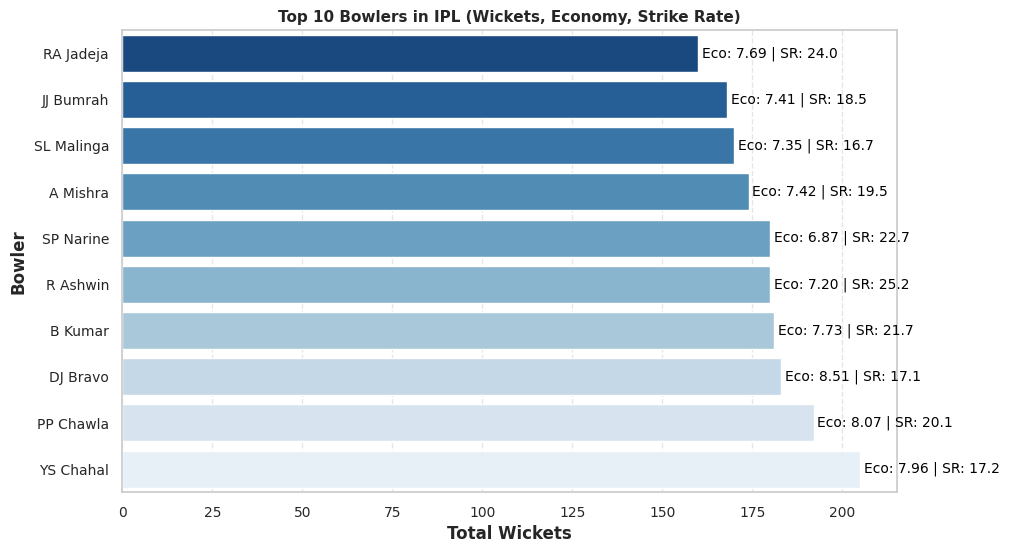

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort bowlers by total wickets
top_10_bowlers_sorted = top_10_bowlers.sort_values(by="total_wickets", ascending=True)

# Set the style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create a bar plot
ax = sns.barplot(
    y=top_10_bowlers_sorted["bowler"],
    x=top_10_bowlers_sorted["total_wickets"],
    palette="Blues_r"
)

# Add data labels (Economy & Strike Rate)
for index, value in enumerate(top_10_bowlers_sorted["total_wickets"]):
    eco_rate = top_10_bowlers_sorted.iloc[index]["economy_rate"]
    strike_rate = top_10_bowlers_sorted.iloc[index]["strike_rate"]

    plt.text(value + 1, index, f"Eco: {eco_rate:.2f} | SR: {strike_rate:.1f}", fontsize=10, color="black", va="center")

# Titles and labels
plt.xlabel("Total Wickets", fontsize=12, fontweight="bold")
plt.ylabel("Bowler", fontsize=12, fontweight="bold")
plt.title("Top 10 Bowlers in IPL (Wickets, Economy, Strike Rate)", fontsize=11, fontweight="bold")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="x", linestyle="--", alpha=0.5)

# Show plot
plt.show()

**BOWLER PERFORMANCE FOR ALL THE SEASON USING LINE CHART**

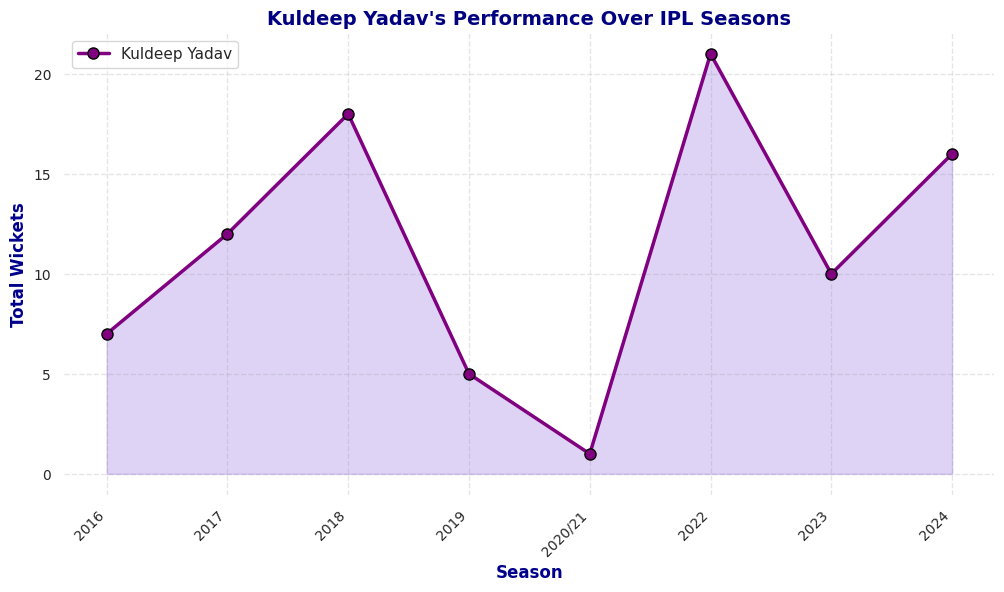

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def bowler_growth(bowler_name, df):
    # Filter for first and second innings
    df_filtered = df[df.inning.isin([1, 2])].copy()

    # Filter for the given bowler
    df_filtered = df_filtered[df_filtered['bowler'] == bowler_name]

    # Group by season and sum total wickets
    df_grouped = df_filtered.groupby(['season'], as_index=False)['is_wicket'].sum()

# Check if the bowler has data
    if df_grouped.empty:
        print(f"No data found for {bowler_name}")
        return

    # Apply seaborn theme
    sns.set_theme(style="whitegrid")

    # Create the figure
    plt.figure(figsize=(12, 6))

    # Create line plot with area fill
    plt.plot(df_grouped['season'], df_grouped['is_wicket'],
             marker="o", color="purple", linewidth=2.5,
             markersize=8, markeredgecolor='black', markerfacecolor='purple', label=bowler_name)
    plt.fill_between(df_grouped['season'], df_grouped['is_wicket'], color="mediumpurple", alpha=0.3)

    # Labels & Title
    plt.xlabel("Season", fontsize=12, fontweight='bold', color="darkblue")
    plt.ylabel("Total Wickets", fontsize=12, fontweight='bold', color="darkblue")
    plt.title(f"{bowler_name}'s Performance Over IPL Seasons", fontsize=14, fontweight="bold", color="navy")

    # Customizing X & Y ticks
    plt.xticks(df_grouped['season'].unique(), rotation=45, ha="right", fontsize=10)
    plt.yticks(fontsize=10)

    # Add legend
    plt.legend(fontsize=11, loc="upper left", frameon=True)

    # Grid and border tweaks
    plt.grid(True, linestyle="--", alpha=0.5)
    sns.despine(left=True, bottom=True)

    # Show the final plot
    plt.show()

# Example Usage
bowler_growth("Kuldeep Yadav", merged_df)


**PERFORMANCE COMPARISON OF 2 BOWLERS USING LINE CHART**

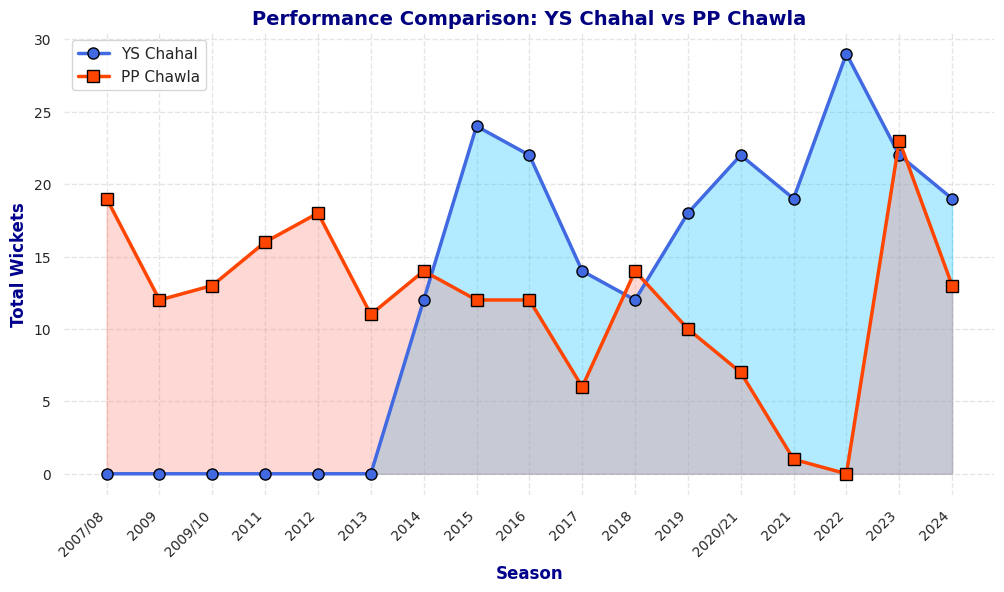

In [ ]:
def compare_bowler_growth(bowler1,bowler2,df):
  #Filter for first and second innings
  df_filtered = df[df.inning.isin([1,2])].copy()

  #Filter for the selected bowlers
  df_bowler1 = df_filtered[df_filtered['bowler'] == bowler1].groupby('season',as_index =False)['is_wicket'].sum()
  df_bowler2 = df_filtered[df_filtered['bowler']==bowler2].groupby('season',as_index=False)['is_wicket'].sum()

  #Check if data exists for both players
  if df_bowler1.empty or df_bowler2.empty:
    print(f"Data not found for one or both players: {bowler1},{bowler2}")
    return

  #Merge dataset for seasons where both played
  df_merged = pd.merge(df_bowler1,df_bowler2, on ='season', how='outer', suffixes = (f'_{bowler1}', f'_{bowler2}')).fillna(0)

  #Apply seaborn theme
  sns.set_theme(style="whitegrid")

  #Create the figure
  plt.figure(figsize=(12,6))

  # Plot bowler 1
  plt.plot(df_merged['season'], df_merged[f'is_wicket_{bowler1}'], marker="o", color="royalblue", linewidth=2.5,
             markersize=8, markeredgecolor='black', markerfacecolor='royalblue', label=bowler1)
  plt.fill_between(df_merged['season'], df_merged[f'is_wicket_{bowler1}'], color="deepskyblue", alpha=0.3)

  # Plot bowler 2
  plt.plot(df_merged['season'], df_merged[f'is_wicket_{bowler2}'],marker="s", color="orangered", linewidth=2.5,
             markersize=8, markeredgecolor='black', markerfacecolor='orangered', label=bowler2)
  plt.fill_between(df_merged['season'], df_merged[f'is_wicket_{bowler2}'], color="salmon", alpha=0.3)

  # Labels & Title
  plt.xlabel("Season", fontsize=12, fontweight='bold', color="darkblue")
  plt.ylabel("Total Wickets", fontsize=12, fontweight='bold', color="darkblue")
  plt.title(f"Performance Comparison: {bowler1} vs {bowler2}", fontsize=14, fontweight="bold", color="navy")

  # Customizing X & Y ticks
  plt.xticks(df_merged['season'].unique(), rotation=45, ha="right", fontsize=10)
  plt.yticks(fontsize=10)

  # Add legend
  plt.legend(fontsize=11, loc="upper left", frameon=True)

  # Grid and border tweaks
  plt.grid(True, linestyle="--", alpha=0.5)
  sns.despine(left=True, bottom=True)

  # Show the final plot
  plt.show()

# Example Usage
compare_bowler_growth("YS Chahal", "PP Chawla", merged_df)


**IPL SEASONS STATISTICS**

In [ ]:
def season_stats(year, team_name = None, player_name = None):
  #Mapping for special season formats
  season_mapping = {"2008":"2007/08","2010":"2009/10","2020":"2020/21","2021":"2020/21"}
  season_year = season_mapping.get(str(year),str(year))

  #Filter batting and bowling data for the given season
  season_df= merged_df[merged_df['season'].astype(str) == season_year]
  season_bowling_df = bowler_data[bowler_data['season'].astype(str) == season_year]

  # Apply team filter if provided
  if team_name:
    season_df = season_df[(season_df['batting_team'] == team_name) | (season_df['bowling_team'] == team_name)]
    season_bowling_df = season_bowling_df[season_bowling_df['bowling_team'] == team_name]

  # Apply player filter if provided
  if player_name:
    season_df = season_df[season_df['batter'] == player_name]
    season_bowling_df = season_bowling_df[season_bowling_df['bowler'] == player_name]

  # Check if any data is available
  if season_df.empty and season_bowling_df.empty:
    return {"message": "No data available for the given filters"}

  # Only calculate team performance if no player_name is provided
  team_performance = []
  if not player_name:
    team_performance = season_df.groupby('batting_team').agg(matches=('match_id', 'nunique'),total_runs=('total_runs', 'sum'),
                                                             total_wickets=('is_wicket', 'sum')).reset_index().to_dict(orient="records")

  # Player performance stats (Batting)
  top_batsmen = season_df.groupby('batter').agg(runs=('batsman_runs', 'sum'),balls=('batsman_runs', 'count')).reset_index()
  top_batsmen['strike_rate'] = (top_batsmen['runs'] / top_batsmen['balls']) * 100
  top_batsman = top_batsmen.sort_values(by='runs', ascending=False).iloc[0].to_dict() if not top_batsmen.empty else {}

  # Player performance stats (Bowling)
  top_bowlers = season_bowling_df.groupby('bowler').agg(wickets=('isBowlerWicket', 'sum'),runs_given=('bowler_run', 'sum'),balls=('ball', 'count')).reset_index()
  top_bowlers['economy'] = top_bowlers['runs_given'] / (top_bowlers['balls'] / 6)
  top_bowler = top_bowlers.sort_values(by='wickets', ascending=False).iloc[0].to_dict() if not top_bowlers.empty else {}

  # Final response
  return {
        "season": year,
        "team_performance": team_performance,  # ✅ Now it's empty if a player is specified
        "top_batsman": top_batsman,
        "top_bowler": top_bowler
    }

In [ ]:
import numpy as np

def season_stats(year, team_name=None, player_name=None):
    # Mapping for special season formats
    season_mapping = {"2008": "2007/08", "2010": "2009/10", "2020": "2020/21", "2021": "2020/21"}
    season_year = season_mapping.get(str(year), str(year))

    # Filter batting and bowling data for the given season
    season_df = merged_df[merged_df['season'].astype(str) == season_year]
    season_bowling_df = bowler_data[bowler_data['season'].astype(str) == season_year]

    # Apply team filter if provided
    if team_name:
        season_df = season_df[(season_df['batting_team'] == team_name) | (season_df['bowling_team'] == team_name)]
        season_bowling_df = season_bowling_df[season_bowling_df['bowling_team'] == team_name]

    # Apply player filter if provided
    if player_name:
        season_df = season_df[season_df['batter'] == player_name]
        season_bowling_df = season_bowling_df[season_bowling_df['bowler'] == player_name]

    # Check if any data is available
    if season_df.empty and season_bowling_df.empty:
        return {"message": "No data available for the given filters"}

    # Team Performance (If no player or team name is provided)
    team_performance = []
    if not player_name and not team_name:
        team_performance = season_df.groupby('batting_team').agg(
            matches=('match_id', 'nunique'),
            total_runs=('total_runs', 'sum'),
            total_wickets=('is_wicket', 'sum')
        ).reset_index().to_dict(orient="records")

    # Get top batsman
    top_batsmen = season_df.groupby('batter').agg(runs=('batsman_runs', 'sum')).reset_index()
    top_batsman_name = top_batsmen.sort_values(by='runs', ascending=False).iloc[0]['batter'] if not top_batsmen.empty else None

    # Get top bowler
    top_bowlers = season_bowling_df.groupby('bowler').agg(wickets=('isBowlerWicket', 'sum')).reset_index()
    top_bowler_name = top_bowlers.sort_values(by='wickets', ascending=False).iloc[0]['bowler'] if not top_bowlers.empty else None

    # Get detailed stats using functions
    top_batsman_stats = get_batsman_statistics(top_batsman_name, season_df) if top_batsman_name else {}
    top_bowler_stats = get_bowler_statistics(top_bowler_name, season_bowling_df) if top_bowler_name else {}

    # Final response
    return {
        "season": year,
        "team_performance": team_performance,
        "top_batsman": top_batsman_stats,
        "top_bowler": top_bowler_stats
    }

In [ ]:
season_stats('2023')

{'season': '2023',
 'team_performance': [{'batting_team': 'Chennai Super Kings',
   'matches': 15,
   'total_runs': 2712,
   'total_wickets': 79},
  {'batting_team': 'Delhi Capitals',
   'matches': 14,
   'total_runs': 2182,
   'total_wickets': 104},
  {'batting_team': 'Gujarat Titans',
   'matches': 17,
   'total_runs': 3054,
   'total_wickets': 86},
  {'batting_team': 'Kolkata Knight Riders',
   'matches': 14,
   'total_runs': 2463,
   'total_wickets': 97},
  {'batting_team': 'Lucknow Super Giants',
   'matches': 15,
   'total_runs': 2479,
   'total_wickets': 103},
  {'batting_team': 'Mumbai Indians',
   'matches': 16,
   'total_runs': 2945,
   'total_wickets': 94},
  {'batting_team': 'Punjab Kings',
   'matches': 14,
   'total_runs': 2556,
   'total_wickets': 99},
  {'batting_team': 'Rajasthan Royals',
   'matches': 14,
   'total_runs': 2419,
   'total_wickets': 84},
  {'batting_team': 'Royal Challengers Bangalore',
   'matches': 14,
   'total_runs': 2502,
   'total_wickets': 80},
 

**WINNING PROBABILITY OF 2 TEAMS**

In [ ]:
def winning_probability(team1, team2, match_data):
    # Get head-to-head stats
    team1_wins = match_data[(match_data['winner'] == team1) &
                            ((match_data['team1'] == team2) | (match_data['team2'] == team2))].shape[0]
    total_matches = match_data[((match_data['team1'] == team1) & (match_data['team2'] == team2)) |
                               ((match_data['team1'] == team2) & (match_data['team2'] == team1))].shape[0]

    head_to_head_win_rate = (team1_wins / total_matches) * 100 if total_matches > 0 else 50  # Default 50% if no history

    # Get recent form (Last 5 matches)
    recent_matches = match_data[(match_data['team1'] == team1) | (match_data['team2'] == team1)].tail(5)
    recent_wins = recent_matches[recent_matches['winner'] == team1].shape[0]
    recent_form_win_rate = (recent_wins / 5) * 100 if not recent_matches.empty else 50  # Default 50% if no recent data

    # Weighted probability calculation
    final_win_probability = (0.7 * head_to_head_win_rate) + (0.3 * recent_form_win_rate)

    return {
        team1: round(final_win_probability, 2),
        team2: round(100 - final_win_probability, 2)
    }

# Example Usage:
winning_probability("Mumbai Indians", "Chennai Super Kings", merged_df)

{'Mumbai Indians': 37.45, 'Chennai Super Kings': 62.55}